<a href="https://colab.research.google.com/github/mohamedhakkim26/Image_Classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classification by implementing Convolutional Neural Network(CNN) by using TensorFlow/Keras**

## **Import Required Libraries**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

## **Load the CIFAR-10 Dataset**

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


## **Data Exploration**

In [ ]:
print(f"Training Data Shape: {x_train.shape}")
print(f"Testing Data Shape: {x_test.shape}")

Training Data Shape: (50000, 32, 32, 3)
Testing Data Shape: (10000, 32, 32, 3)


## **Normalize the Data (Scale Pixel Values)**

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

## **Convert Labels to One-Hot Encoding**

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## **Build the CNN Model**

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **Compile the Model**

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


## **Train the Model**

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 52ms/step - accuracy: 0.3674 - loss: 1.7171 - val_accuracy: 0.5587 - val_loss: 1.2378
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.5908 - loss: 1.1587 - val_accuracy: 0.6327 - val_loss: 1.0367
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.6597 - loss: 0.9672 - val_accuracy: 0.6761 - val_loss: 0.9256
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 51ms/step - accuracy: 0.7045 - loss: 0.8440 - val_accuracy: 0.6709 - val_loss: 0.9445
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 57ms/step - accuracy: 0.7414 - loss: 0.7398 - val_accuracy: 0.7015 - val_loss: 0.8738
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 51ms/step - accuracy: 0.7674 - loss: 0.6641 - val_accuracy: 0.6929 - val_loss: 0.9013
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 51ms/step - accuracy: 0.7888 - loss: 0.5963 - val_accuracy: 0.7099 - val_loss: 0.8651
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.8113 

## **Evaluate Model Performance**

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7194 - loss: 0.9788

Test Accuracy: 0.7115


## **Visualizing Training Accuracy & Loss**

In [18]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

## **Plot Accuracy**

Text(0.5, 1.0, 'Training & Validation Accuracy')

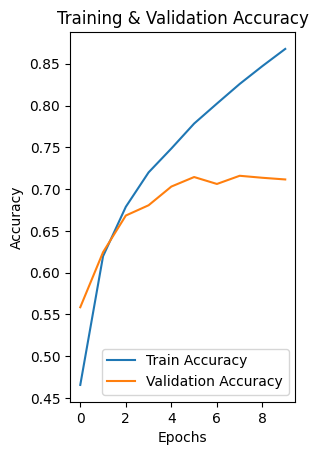

In [19]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

## **Plot Loss**

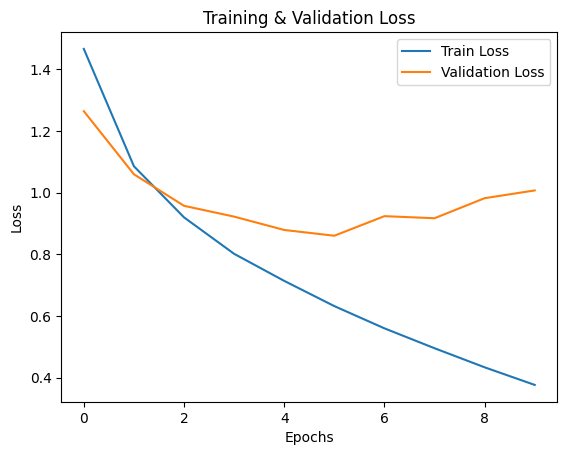

In [20]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.show()

## **Making Predictions**

In [21]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


## **Show some sample predictions**

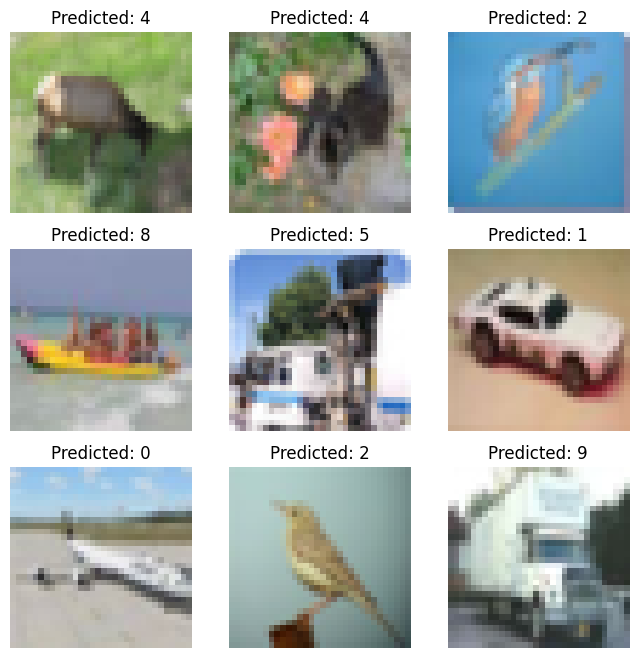

In [23]:
fig, axes = plt.subplots(3,3, figsize=(8,8))
axes = axes.ravel()

for i in range(9):
    index = np.random.randint(0, len(x_test))
    axes[i].imshow(x_test[index])
    axes[i].set_title(f"Predicted: {predicted_classes[index]}")
    axes[i].axis('off')

plt.show()
